In [323]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

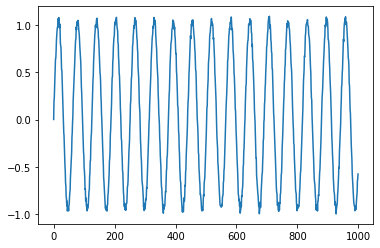

In [324]:
T = 10
N = 1000
X = np.arange(0, N)
Y = np.sin(X * 0.1) + np.random.rand(N) * 0.1
plt.plot(X, Y)

In [325]:
inputs_dataset = np.zeros((N-T, T))
targets_dataset = np.zeros(N-T)

for t in range(N-T):
    inputs_dataset[t] = np.array(Y[t:T+t])
    targets_dataset[t] = np.array(Y[T+t])

In [326]:
train_inputs = torch.from_numpy(inputs_dataset[:N//2].astype(np.float32)).view(-1, T)
train_targets = torch.from_numpy(targets_dataset[:N//2].astype(np.float32)).view(-1, 1)
test_inputs = torch.from_numpy(inputs_dataset[N//2:].astype(np.float32)).view(-1, T)
test_targets = torch.from_numpy(targets_dataset[N//2:].astype(np.float32)).view(-1, 1)

In [327]:
model = nn.Linear(T, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [328]:
def train_no_batch(model, criterion, optimizer, train_inputs, test_inputs, train_targets, test_targets, n_epochs=100):

    train_losses = []
    test_losses = []
    
    for it in range(n_epochs):
        optimizer.zero_grad()
        
        outputs = model(train_inputs)
        loss = criterion(outputs, train_targets)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
        
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_targets)
        test_losses.append(test_loss.item())
        
        print(f'Iteration {it+1}/{n_epochs}')
        
    return train_losses, test_losses

In [329]:
train_losses, test_losses = train_no_batch(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    train_inputs=train_inputs,
    train_targets=train_targets,
    test_inputs=test_inputs,
    test_targets=test_targets,
    n_epochs=500,
)

Iteration 1/500
Iteration 2/500
Iteration 3/500
Iteration 4/500
Iteration 5/500
Iteration 6/500
Iteration 7/500
Iteration 8/500
Iteration 9/500
Iteration 10/500
Iteration 11/500
Iteration 12/500
Iteration 13/500
Iteration 14/500
Iteration 15/500
Iteration 16/500
Iteration 17/500
Iteration 18/500
Iteration 19/500
Iteration 20/500
Iteration 21/500
Iteration 22/500
Iteration 23/500
Iteration 24/500
Iteration 25/500
Iteration 26/500
Iteration 27/500
Iteration 28/500
Iteration 29/500
Iteration 30/500
Iteration 31/500
Iteration 32/500
Iteration 33/500
Iteration 34/500
Iteration 35/500
Iteration 36/500
Iteration 37/500
Iteration 38/500
Iteration 39/500
Iteration 40/500
Iteration 41/500
Iteration 42/500
Iteration 43/500
Iteration 44/500
Iteration 45/500
Iteration 46/500
Iteration 47/500
Iteration 48/500
Iteration 49/500
Iteration 50/500
Iteration 51/500
Iteration 52/500
Iteration 53/500
Iteration 54/500
Iteration 55/500
Iteration 56/500
Iteration 57/500
Iteration 58/500
Iteration 59/500
Iterat

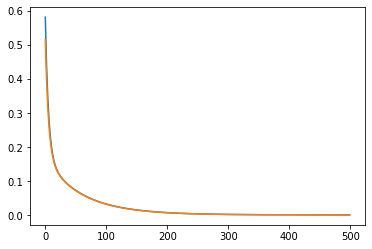

In [330]:
plt.plot(train_losses)
plt.plot(test_losses)

### Wrong way of validating model
This way of making predictions is very misleading since we just predict one value at a time

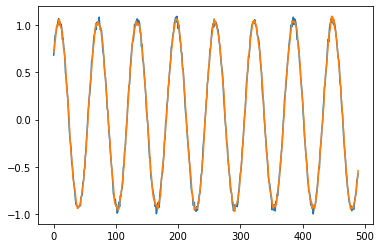

In [331]:
plt.plot(test_targets)
plt.plot([model(inputs).item() for inputs in test_inputs])

### Correct Method of validating our model
This method shows us how good our model is at making multiple continuous prediction of a horizon

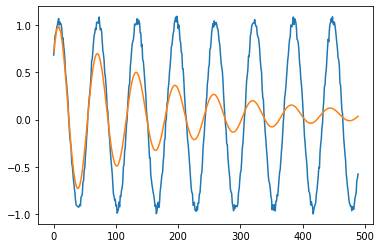

In [332]:
X_to_predict = test_inputs[0]
Y_predicted = []

while len(Y_predicted) < len(test_targets):
    prediction = model(X_to_predict)
    X_to_predict = torch.concat((X_to_predict[1:], prediction))
    Y_predicted.append(prediction.item())
    
plt.plot(test_targets)
plt.plot(Y_predicted)